In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from brainflow.data_filter import DataFilter, DetrendOperations, FilterTypes, AggOperations, DetrendOperations
from scipy.signal import welch


In [2]:
# 3 is left side of brain, 6 is right side of brain

sampling_rate = 250
data_right = np.genfromtxt('right1.csv', delimiter=' ')
channel_3_right = []
channel_6_right = []

for i in range(1, len(data_right)):
    channel_3_right.append([data_right[i][1]])
    channel_6_right.append([data_right[i][2]])

t_right = np.array(range(len(data_right) - 1)) / sampling_rate 

In [3]:
sampling_rate = 250
data_left = np.genfromtxt('left1.csv', delimiter=' ')
channel_3_left = []
channel_6_left = []

for i in range(1, len(data_left)):
    channel_3_left.append([data_left[i][1]])
    channel_6_left.append([data_left[i][2]])

t_left = np.array(range(len(data_left) - 1)) / sampling_rate

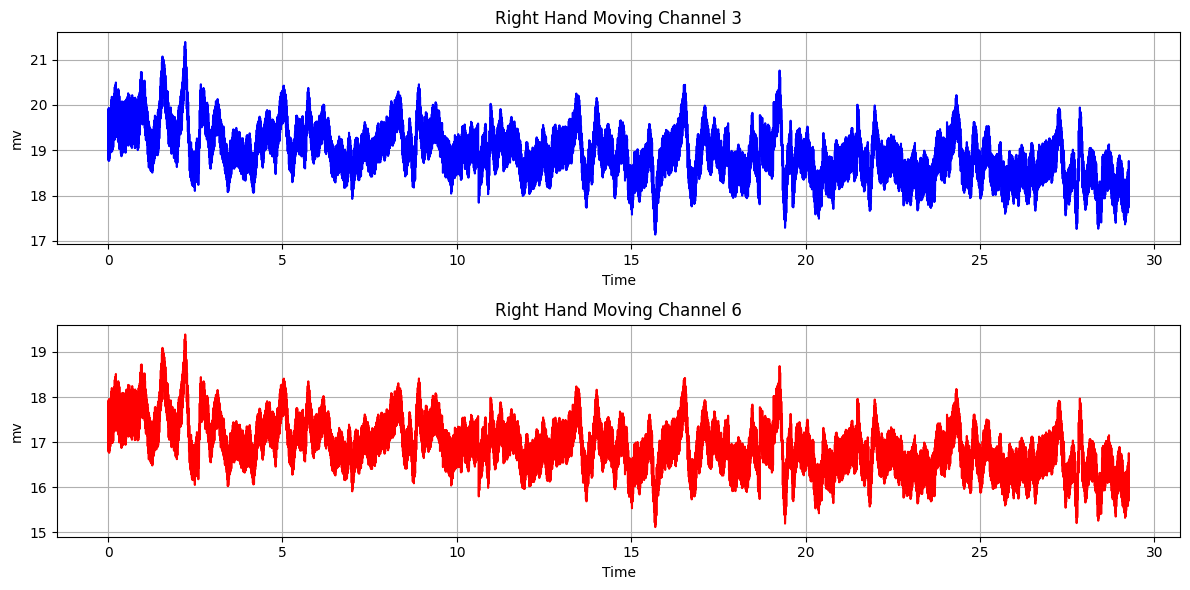

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(t_right, channel_3_right, 'b')
plt.title('Right Hand Moving Channel 3')
plt.xlabel('Time')
plt.ylabel('mv')
plt.grid(True)

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(t_right, channel_6_right, 'r')
plt.title('Right Hand Moving Channel 6')
plt.xlabel('Time')
plt.ylabel('mv')
plt.grid(True)

plt.tight_layout()
plt.show()

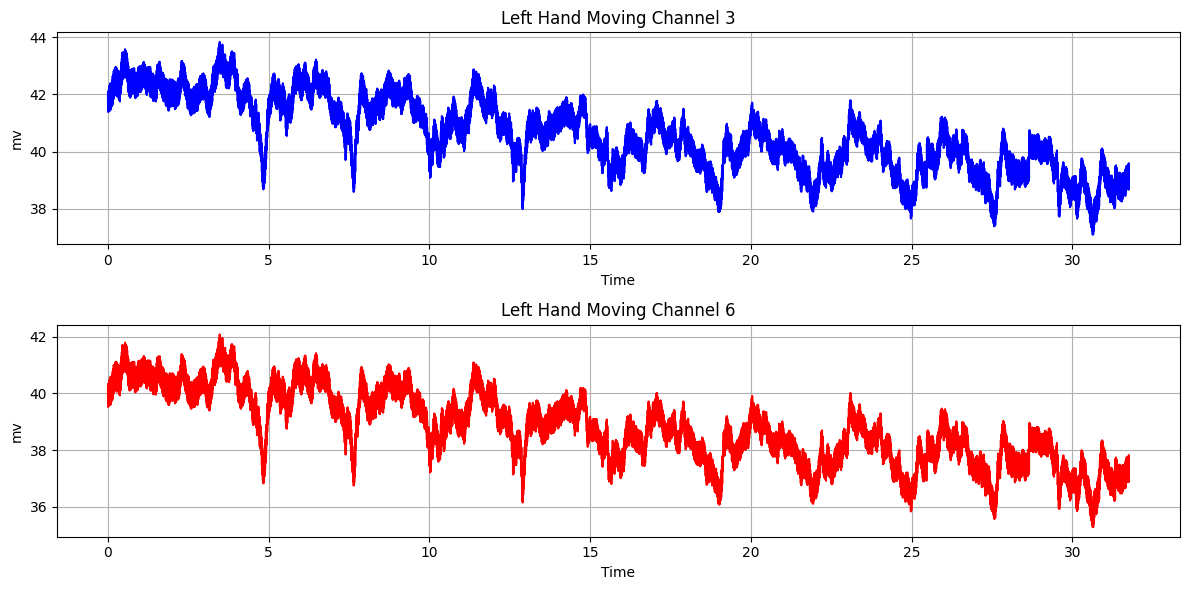

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(t_left, channel_3_left, 'b')
plt.title('Left Hand Moving Channel 3')
plt.xlabel('Time')
plt.ylabel('mv')
plt.grid(True)

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(t_left, channel_6_left, 'r')
plt.title('Left Hand Moving Channel 6')
plt.xlabel('Time')
plt.ylabel('mv')
plt.grid(True)

plt.tight_layout()
plt.show()

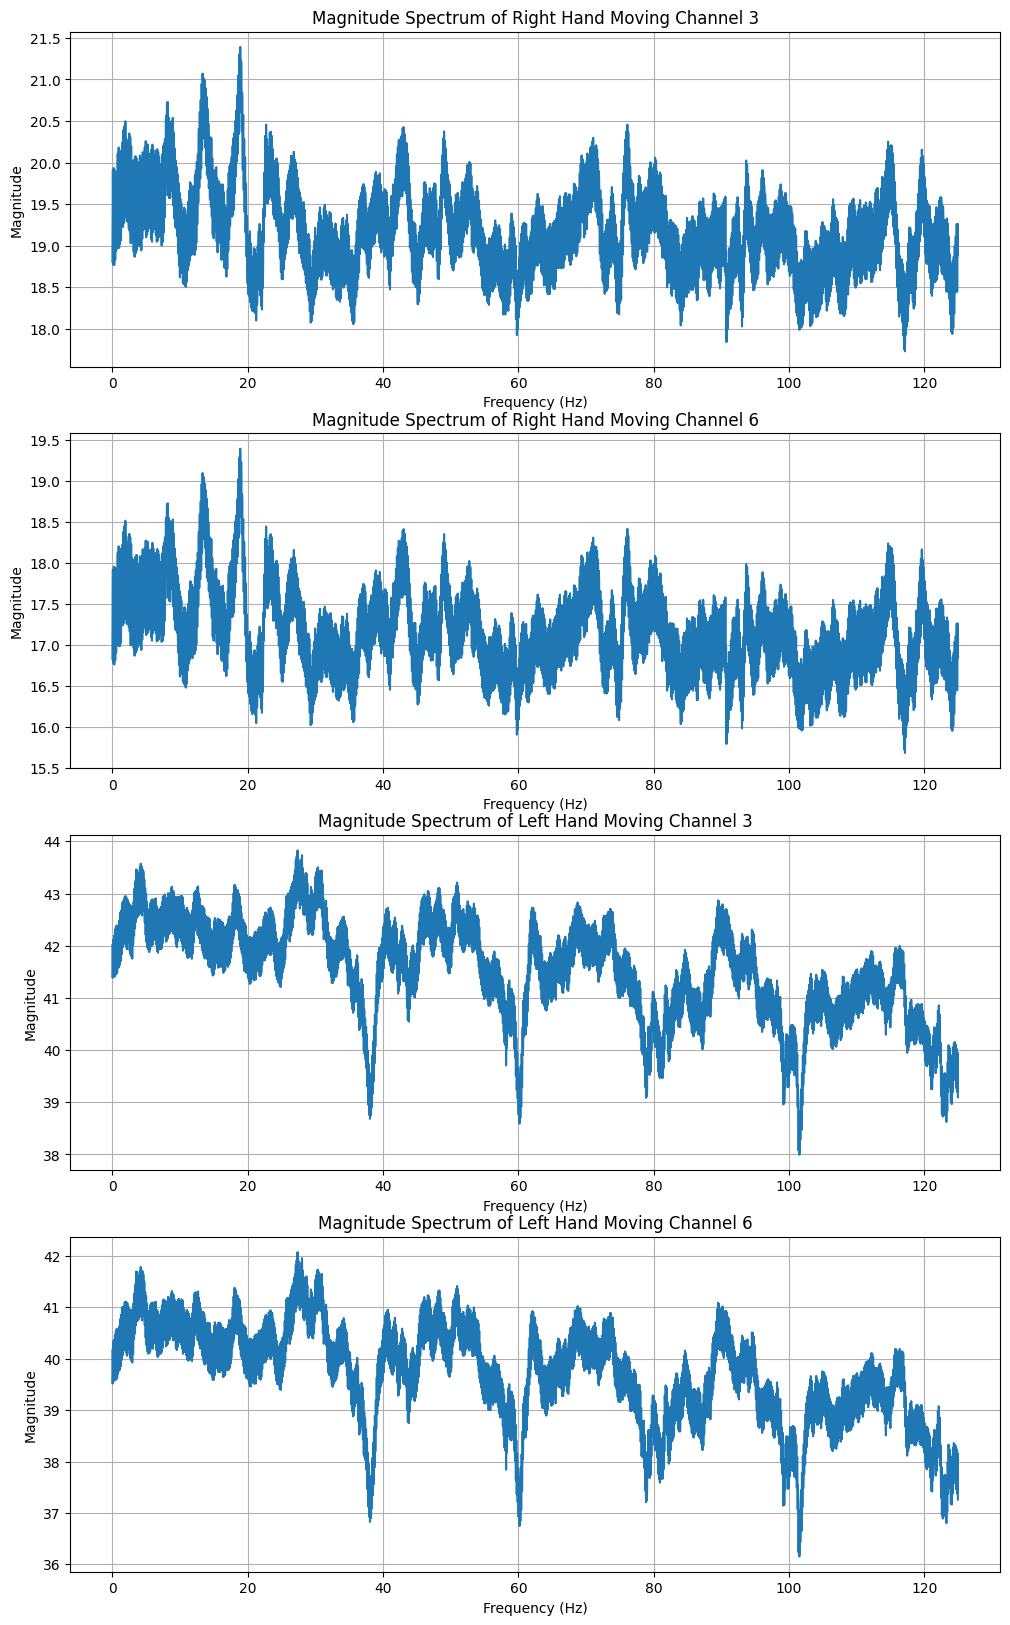

In [6]:
plt.figure(figsize=(12, 20))

plt.subplot(4, 1, 1)
fft_result_3_right = np.fft.fft(channel_3_right)
N = len(channel_3_right)
frequencies_3_right = np.fft.fftfreq(N, 1/sampling_rate)
magnitudes_3_right = np.abs(fft_result_3_right)
plt.plot(frequencies_3_right[:N // 2], magnitudes_3_right[:N // 2])
plt.title('Magnitude Spectrum of Right Hand Moving Channel 3')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(4, 1, 2)
fft_result_6_right = np.fft.fft(channel_6_right)
N = len(channel_6_right)
frequencies_6_right = np.fft.fftfreq(N, 1/sampling_rate)
magnitudes_6_right = np.abs(fft_result_6_right)
plt.plot(frequencies_6_right[:N // 2], magnitudes_6_right[:N // 2])
plt.title('Magnitude Spectrum of Right Hand Moving Channel 6')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(4, 1, 3)
fft_result_3_left = np.fft.fft(channel_3_left)
N = len(channel_3_left)
frequencies_3_left = np.fft.fftfreq(N, 1/sampling_rate)
magnitudes_3_left = np.abs(fft_result_3_left)
plt.plot(frequencies_3_left[:N // 2], magnitudes_3_left[:N // 2])
plt.title('Magnitude Spectrum of Left Hand Moving Channel 3')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(4, 1, 4)
fft_result_6_left = np.fft.fft(channel_6_left)
N = len(channel_6_left)
frequencies_6_left = np.fft.fftfreq(N, 1/sampling_rate)
magnitudes_6_left = np.abs(fft_result_6_left)
plt.plot(frequencies_6_left[:N // 2], magnitudes_6_left[:N // 2])
plt.title('Magnitude Spectrum of Left Hand Moving Channel 6')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.show()

In [8]:
channel_3_left_flattened = np.array(channel_3_left).flatten()

DataFilter.detrend(channel_3_left_flattened, DetrendOperations.CONSTANT.value)
DataFilter.perform_bandpass(channel_3_left_flattened, sampling_rate, 3.0, 45.0, 2,
                            FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)
DataFilter.perform_bandstop(channel_3_left_flattened, sampling_rate, 48.0, 52.0, 2,
                            FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)
DataFilter.perform_bandstop(channel_3_left_flattened, sampling_rate, 58.0, 62.0, 2,
                            FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)

b_notch_60, a_notch_60 = scipy.signal.iirnotch(60.0, Q=20, fs=sampling_rate)
filtered_p_data = scipy.signal.filtfilt(b_notch_60, a_notch_60, channel_3_left_flattened)
b_notch_20, a_notch_20 = scipy.signal.iirnotch(20.0, Q=20, fs=sampling_rate)
filtered_data = scipy.signal.filtfilt(b_notch_20, a_notch_20, filtered_p_data)



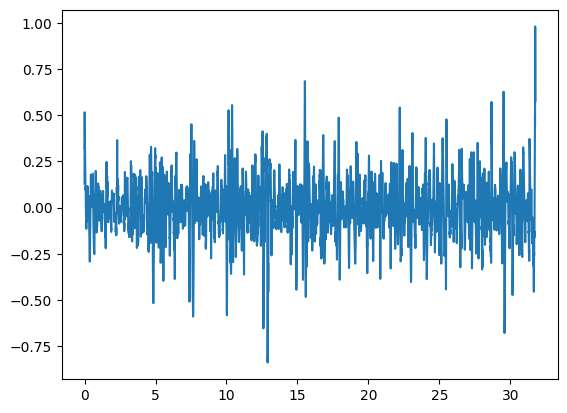

In [25]:
# filtering did not work too well

plt.plot(t_left, filtered_data)

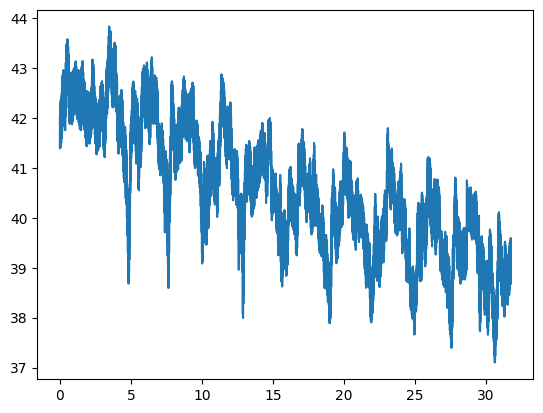

In [26]:
plt.plot(t_left, channel_3_left)